In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

In [198]:
import warnings
warnings.filterwarnings('ignore')

In [199]:
df = pd.read_csv('first inten project.csv')

#### Data Preprocessing
Data preprocessing is a critical step in  machine learning pipeline. It involves preparing raw data for analysis or modeling by transforming it into a format that is suitable for machine learning algorithms. This process can significantly impact the performance and accuracy of your model.

In [200]:
df.shape  # view dimensions of dataSet

(36285, 17)

In [201]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [202]:
df.tail()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [203]:
col_names = df.columns
col_names

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

Wrong Space in average price column

In [204]:

df.rename(columns={'average price ': 'average price'}, inplace=True)

In [205]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Standardize column names
df.rename(columns={'p-not-c': 'p_not_c'}, inplace=True)
df.rename(columns={'p-c': 'p_c'}, inplace=True)

In [206]:
df.info()  # summary of dataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  p_c                       36285 non-null  int64  
 12  p_not_c                   36285 non-null  int64  
 13  average_price             36285 non-null  float64
 14  specia

Explore Categorical Data

In [207]:
# Find categorical variables
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

if categorical_columns:
    print("Categorical Variables are:")
    for i, col in enumerate(categorical_columns, 1):
        print(f"{i}. {col}")
else:
    print("No categorical variables found.")

Categorical Variables are:
1. booking_id
2. type_of_meal
3. room_type
4. market_segment_type
5. date_of_reservation
6. booking_status


In [208]:
df[categorical_columns].head()

,booking_id,type_of_meal,room_type,market_segment_type,date_of_reservation,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,10/2/2015,Not_Canceled
1,INN00002,Not Selected,Room_Type 1,Online,11/6/2018,Not_Canceled
2,INN00003,Meal Plan 1,Room_Type 1,Online,2/28/2018,Canceled
3,INN00004,Meal Plan 1,Room_Type 1,Online,5/20/2017,Canceled
4,INN00005,Not Selected,Room_Type 1,Online,4/11/2018,Canceled


In [209]:
# Check Missing Values
df[categorical_columns].isnull().sum()

booking_id             0
type_of_meal           0
room_type              0
market_segment_type    0
date_of_reservation    0
booking_status         0
dtype: int64

In [210]:
# View Frequency of Categorical Values
for col in categorical_columns:
    print(df[col].value_counts())
    print("-" * 50)

booking_id
INN36286    1
INN00001    1
INN00002    1
INN00003    1
INN00004    1
           ..
INN00018    1
INN00017    1
INN00016    1
INN00015    1
INN00014    1
Name: count, Length: 36285, dtype: int64
--------------------------------------------------
type_of_meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64
--------------------------------------------------
room_type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
--------------------------------------------------
market_segment_type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
--------------------------------------------------
date_of_reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231
6/24/2018     213
9/18/2017     201
         

In [211]:
# Frequency Distribution of Categorical Columns
for col in categorical_columns:
    print(df[col].value_counts()/np.float64(len(df)))
    print("-" * 50)

booking_id
INN36286    0.000028
INN00001    0.000028
INN00002    0.000028
INN00003    0.000028
INN00004    0.000028
              ...   
INN00018    0.000028
INN00017    0.000028
INN00016    0.000028
INN00015    0.000028
INN00014    0.000028
Name: count, Length: 36285, dtype: float64
--------------------------------------------------
type_of_meal
Meal Plan 1     0.767314
Not Selected    0.141436
Meal Plan 2     0.091112
Meal Plan 3     0.000138
Name: count, dtype: float64
--------------------------------------------------
room_type
Room_Type 1    0.775472
Room_Type 4    0.166984
Room_Type 6    0.026623
Room_Type 2    0.019071
Room_Type 5    0.007303
Room_Type 7    0.004354
Room_Type 3    0.000193
Name: count, dtype: float64
--------------------------------------------------
market_segment_type
Online           0.639961
Offline          0.290230
Corporate        0.055588
Complementary    0.010776
Aviation         0.003445
Name: count, dtype: float64
-------------------------------------

In [212]:
# unique values in categorical columns
for col in categorical_columns:
    print(f"{col} has {df[col].nunique()} unique values")

booking_id has 36285 unique values
type_of_meal has 4 unique values
room_type has 7 unique values
market_segment_type has 5 unique values
date_of_reservation has 553 unique values
booking_status has 2 unique values


#### Visualizations for More Understanding

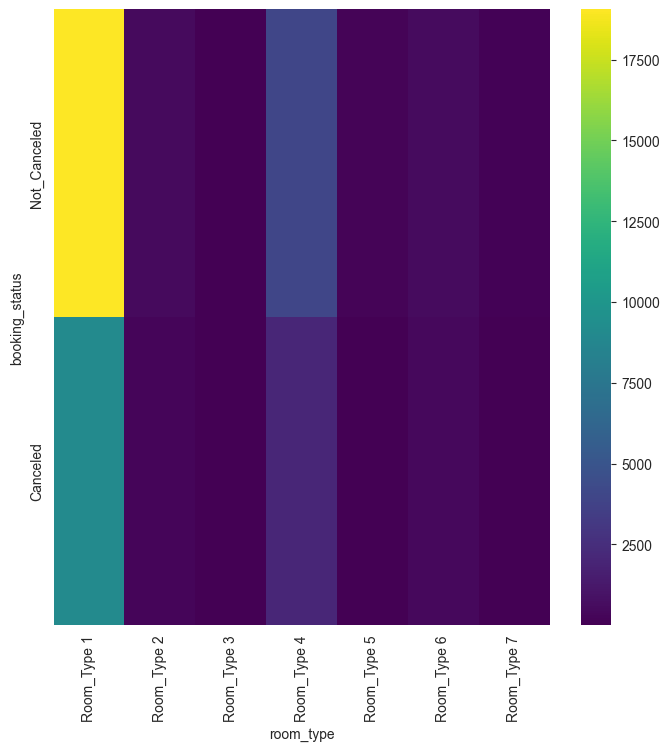

In [213]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['booking_status'].value_counts()
    for x_label, grp in df.groupby('room_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('room_type')
_ = plt.ylabel('booking_status')

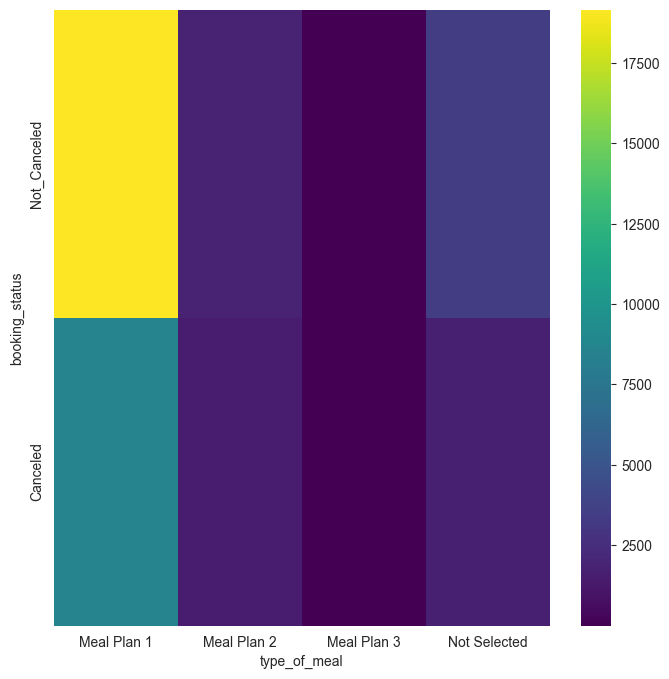

In [214]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['booking_status'].value_counts()
    for x_label, grp in df.groupby('type_of_meal')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type_of_meal')
_ = plt.ylabel('booking_status')

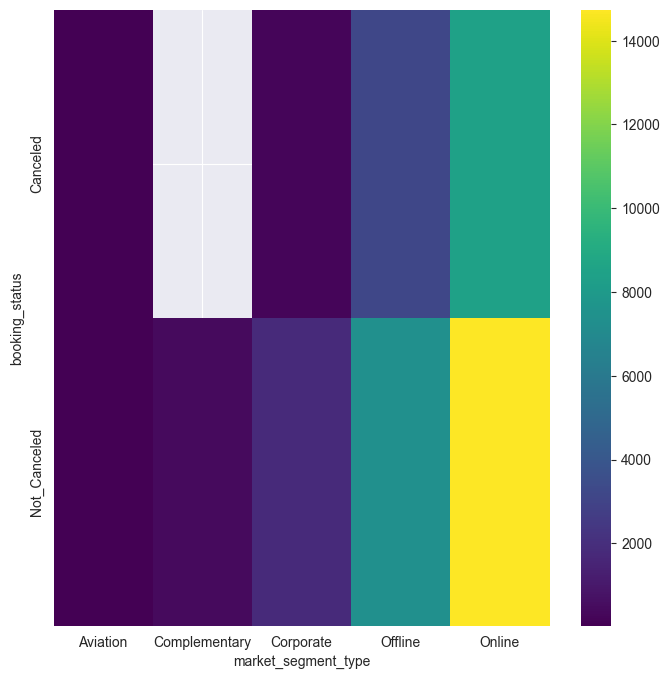

In [215]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['booking_status'].value_counts()
    for x_label, grp in df.groupby('market_segment_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('market_segment_type')
_ = plt.ylabel('booking_status')

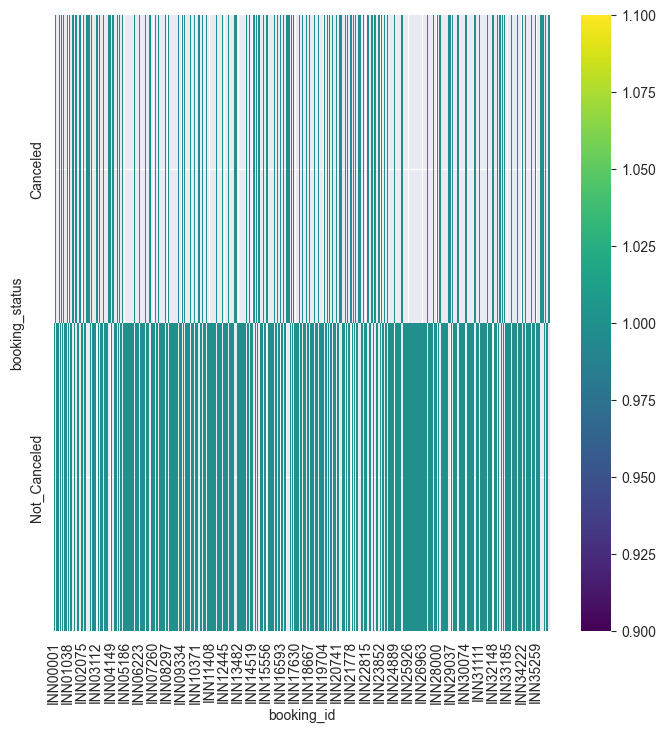

In [216]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['booking_status'].value_counts()
    for x_label, grp in df.groupby('booking_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('booking_id')
_ = plt.ylabel('booking_status')

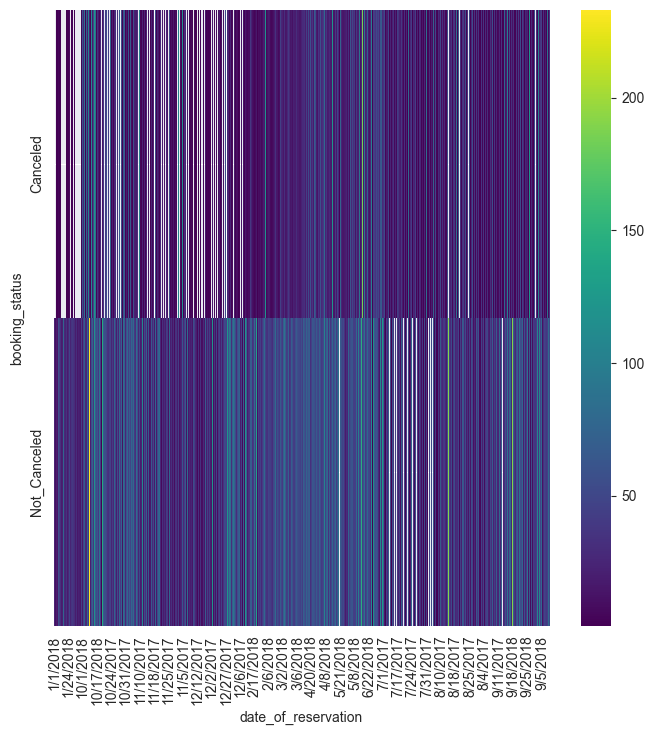

In [217]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['booking_status'].value_counts()
    for x_label, grp in df.groupby('date_of_reservation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date_of_reservation')
_ = plt.ylabel('booking_status')

#### Explore Numerical Data

In [218]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 11 numerical variables

The numerical variables are : ['number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests']


In [219]:
# view the numerical variables

df[numerical].head()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,car_parking_space,lead_time,repeated,p_c,p_not_c,average_price,special_requests
0,1,1,2,5,0,224,0,0,0,88.00,0
1,1,0,1,3,0,5,0,0,0,106.68,1
2,2,1,1,3,0,1,0,0,0,50.00,0
3,1,0,0,2,0,211,0,0,0,100.00,1
4,1,0,1,2,0,48,0,0,0,77.00,0


In [220]:
# check missing values in numerical variables

df[numerical].isnull().sum()

number_of_adults            0
number_of_children          0
number_of_weekend_nights    0
number_of_week_nights       0
car_parking_space           0
lead_time                   0
repeated                    0
p_c                         0
p_not_c                     0
average_price               0
special_requests            0
dtype: int64

In [221]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       number_of_adults  number_of_children  number_of_weekend_nights  \
count           36285.0             36285.0                   36285.0   
mean                2.0                 0.0                       1.0   
std                 1.0                 0.0                       1.0   
min                 0.0                 0.0                       0.0   
25%                 2.0                 0.0                       0.0   
50%                 2.0                 0.0                       1.0   
75%                 2.0                 0.0                       2.0   
max                 4.0                10.0                       7.0   

       number_of_week_nights  car_parking_space  lead_time  repeated      p_c  \
count                36285.0            36285.0    36285.0   36285.0  36285.0   
mean                     2.0                0.0       85.0       0.0      0.0   
std                      1.0                0.0       86.0       0.0      0.0   
min               

#### Visualization to understand Nature of the data and see how it is Distributed

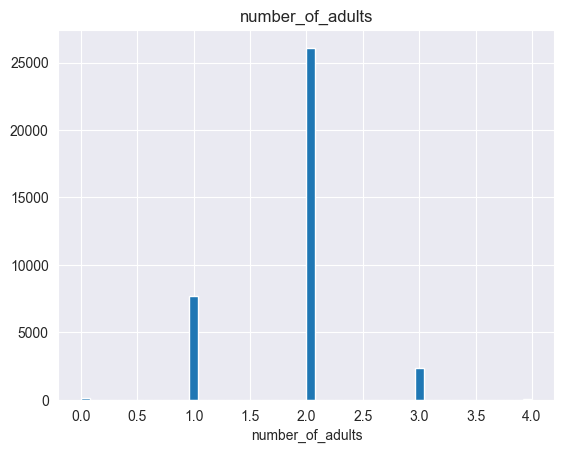

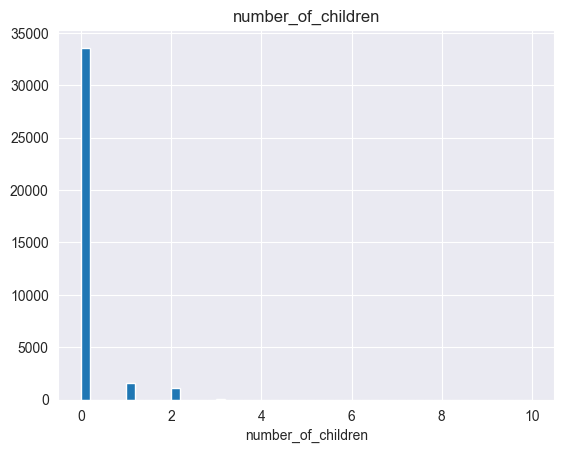

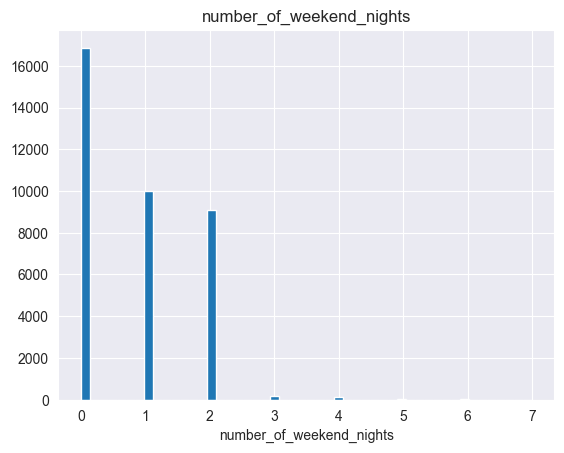

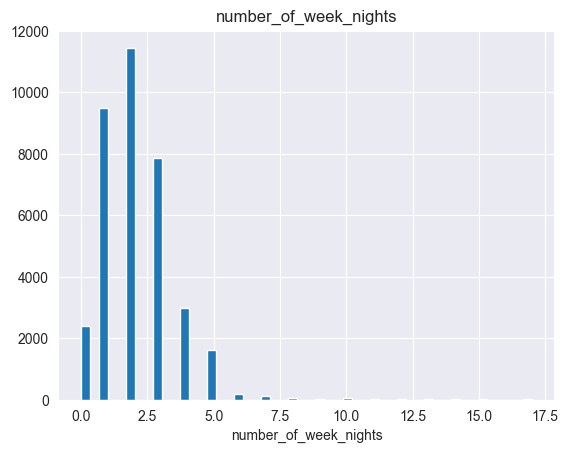

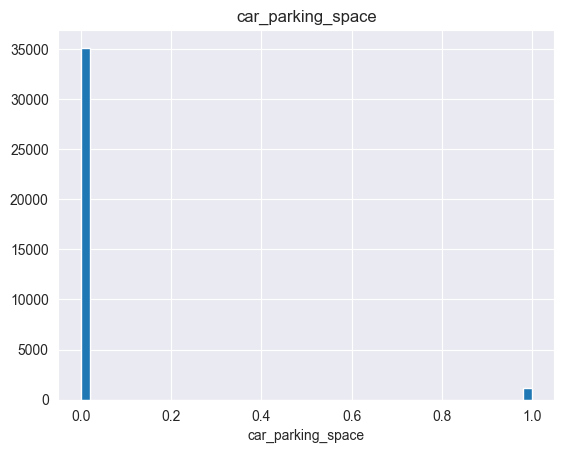

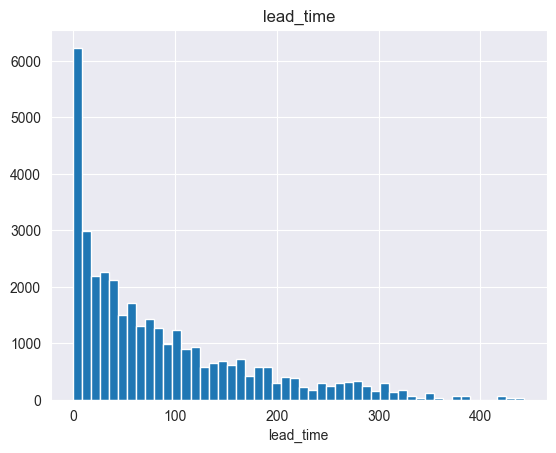

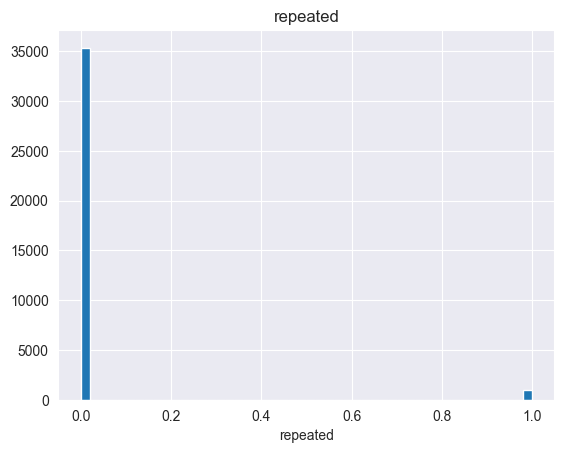

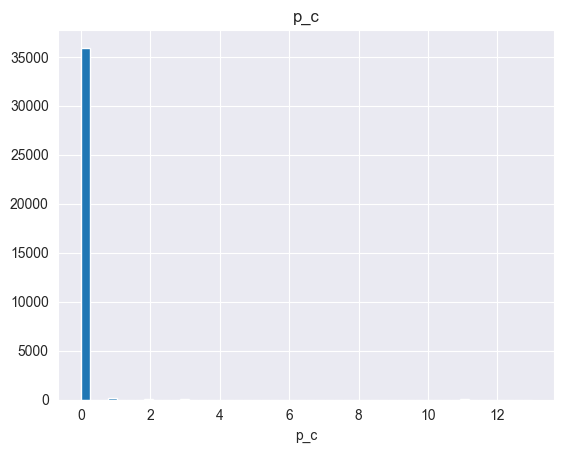

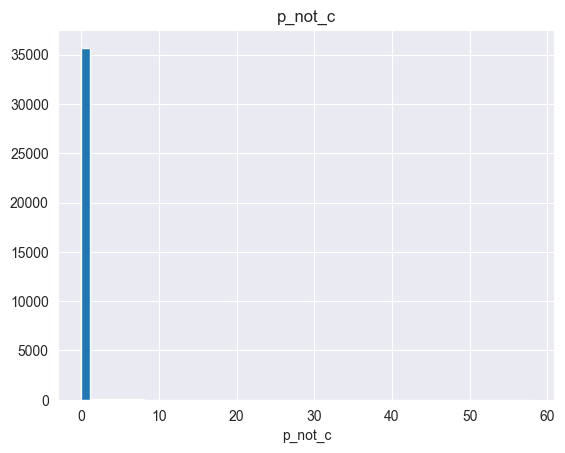

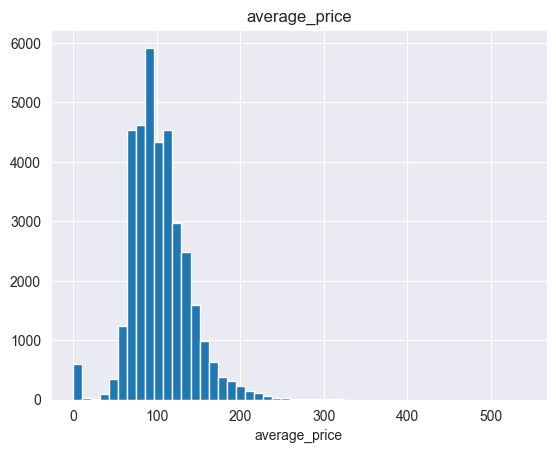

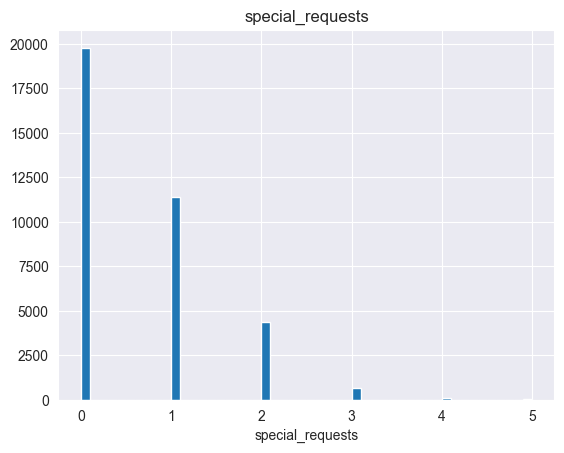

In [222]:
for col in df.columns:
  if df[col].dtype == 'float64' or df[col].dtype == 'int64' or df[col].dtype == 'int32' :
    df[col].hist(bins=50)
    plt.xlabel(col)
    plt.title(col)
    plt.show()

#### Outliers

<Axes: >

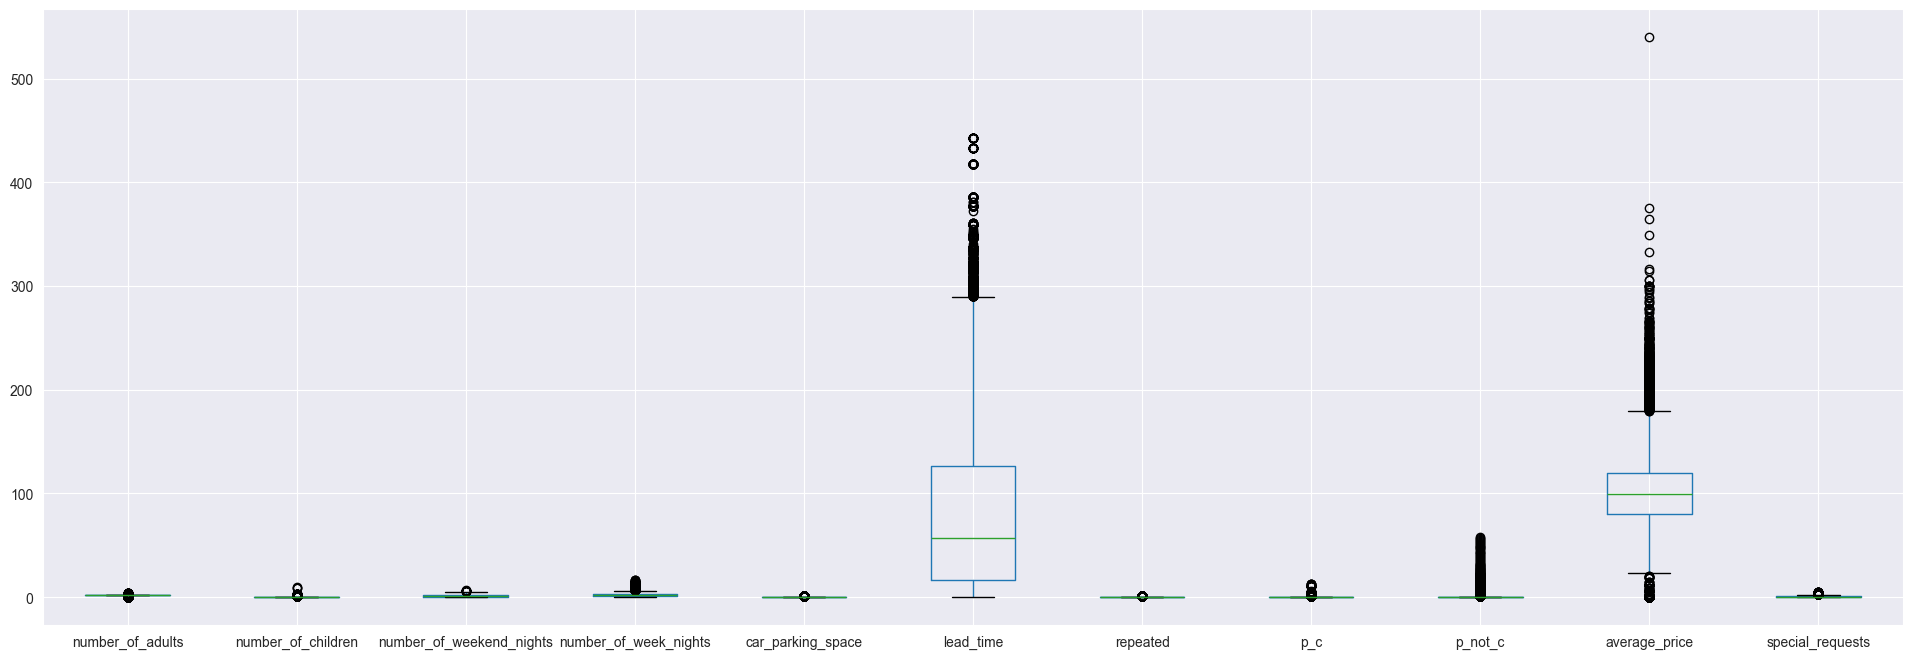

In [223]:
plt.figure(figsize=(24, 8))
df.boxplot()

In [224]:
# find outliers for lead_time variable

IQR = df.lead_time.quantile(0.75) - df.lead_time.quantile(0.25)
Lower_fence = df.lead_time.quantile(0.25) - (IQR * 3)
Upper_fence = df.lead_time.quantile(0.75) + (IQR * 3)
print('lead_time outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

lead_time outliers are values < -310.0 or > 453.0


In [225]:
# find outliers for p_not_c variable

IQR = df.p_not_c.quantile(0.75) - df.p_not_c.quantile(0.25)
Lower_fence = df.p_not_c.quantile(0.25) - (IQR * 3)
Upper_fence = df.p_not_c.quantile(0.75) + (IQR * 3)
print('p_not_c outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

p_not_c outliers are values < 0.0 or > 0.0


In [226]:
# find outliers for average_price variable

IQR = df.average_price.quantile(0.75) - df.average_price.quantile(0.25)
Lower_fence = df.average_price.quantile(0.25) - (IQR * 3)
Upper_fence = df.average_price.quantile(0.75) + (IQR * 3)
print('average_price outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

average_price outliers are values < -38.80000000000001 or > 239.10000000000002


In [227]:
# find outliers for number_of_week_nights variable

IQR = df.number_of_week_nights.quantile(0.75) - df.number_of_week_nights.quantile(0.25)
Lower_fence = df.number_of_week_nights.quantile(0.25) - (IQR * 3)
Upper_fence = df.number_of_week_nights.quantile(0.75) + (IQR * 3)
print('number_of_week_nights outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

number_of_week_nights outliers are values < -5.0 or > 9.0


In [228]:
def remove_outliers_iqr(df, columns=None):
  if columns is None:
          columns = df.columns

  df_cleaned = df.copy()
  for column in columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

  return df_cleaned

In [229]:
df = remove_outliers_iqr(df, ['lead_time', 'p_not_c', 'average_price','number_of_week_nights'])

<Axes: xlabel='lead_time'>

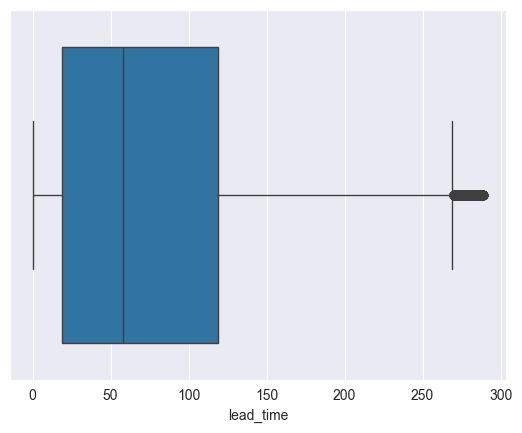

In [230]:
sns.boxplot(data=df, x=df['lead_time'])

<Axes: xlabel='p_not_c'>

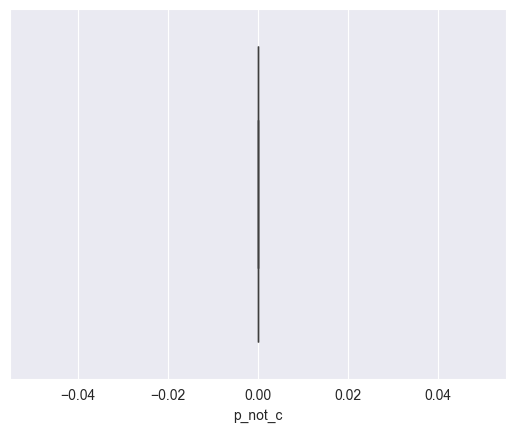

In [231]:
sns.boxplot(data=df, x=df['p_not_c'])

<Axes: xlabel='average_price'>

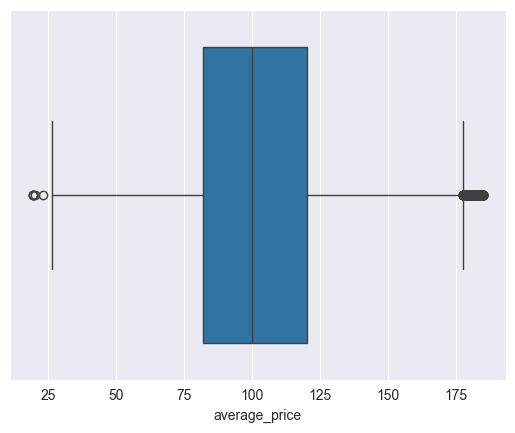

In [232]:
sns.boxplot(data=df, x=df['average_price'])

<Axes: xlabel='number_of_week_nights'>

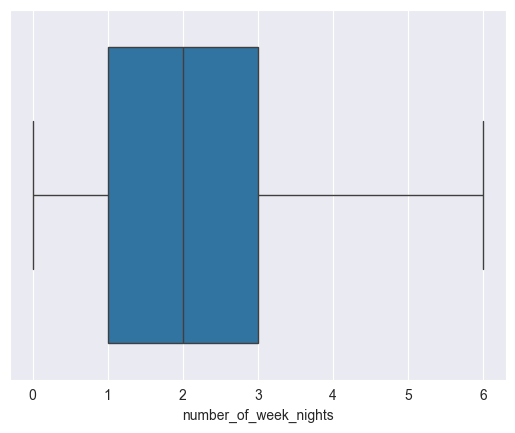

In [233]:
sns.boxplot(data=df, x=df['number_of_week_nights'])

In [234]:
df.shape

(32469, 17)

#### Transforming Categorical Data

In [235]:
# from sklearn.preprocessing import LabelEncoder
# df = df.drop(columns=['booking_id'])
# df = df.drop(columns=['date_of_reservation'])
# 
# label_encoders = {}
# df=df.copy()
# for column in df.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     df[column] = le.fit_transform(df[column])
#     label_encoders[column] = le
#     mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#     print("\nMapping of Labels to Original Categories:")
#     print(mapping)
# print(df.select_dtypes(include=['object']).columns)
# print(df.select_dtypes(include=['object']).columns)

In [236]:
# Convert booking status to binary
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['type_of_meal', 'room_type', 'market_segment_type'], drop_first=True)

# Drop irrelevant columns
df = df.drop(columns=['booking_id'])

df.head()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,car_parking_space,lead_time,repeated,p_c,p_not_c,average_price,...,room_type_Room_Type 2,room_type_Room_Type 3,room_type_Room_Type 4,room_type_Room_Type 5,room_type_Room_Type 6,room_type_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1,1,2,5,0,224,0,0,0,88.00,...,False,False,False,False,False,False,False,False,True,False
1,1,0,1,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,2,1,1,3,0,1,0,0,0,50.00,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,1,0,1,2,0,48,0,0,0,77.00,...,False,False,False,False,False,False,False,False,False,True


In [237]:
# Convert 'date_of_reservation' to datetime if not already
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], errors='coerce')

# Extract month from the date
df['Month'] = df['date_of_reservation'].dt.month


# Drop original date column
df = df.drop(columns=['date_of_reservation'])

In [238]:
df.head()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,car_parking_space,lead_time,repeated,p_c,p_not_c,average_price,...,room_type_Room_Type 3,room_type_Room_Type 4,room_type_Room_Type 5,room_type_Room_Type 6,room_type_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,Month
0,1,1,2,5,0,224,0,0,0,88.00,...,False,False,False,False,False,False,False,True,False,10.0
1,1,0,1,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,True,11.0
2,2,1,1,3,0,1,0,0,0,50.00,...,False,False,False,False,False,False,False,False,True,2.0
3,1,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,True,5.0
4,1,0,1,2,0,48,0,0,0,77.00,...,False,False,False,False,False,False,False,False,True,4.0


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32469 entries, 0 to 36284
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number_of_adults                   32469 non-null  int64  
 1   number_of_children                 32469 non-null  int64  
 2   number_of_weekend_nights           32469 non-null  int64  
 3   number_of_week_nights              32469 non-null  int64  
 4   car_parking_space                  32469 non-null  int64  
 5   lead_time                          32469 non-null  int64  
 6   repeated                           32469 non-null  int64  
 7   p_c                                32469 non-null  int64  
 8   p_not_c                            32469 non-null  int64  
 9   average_price                      32469 non-null  float64
 10  special_requests                   32469 non-null  int64  
 11  booking_status                     32469 non-null  int64  


In [240]:
df.isnull().sum()

number_of_adults                      0
number_of_children                    0
number_of_weekend_nights              0
number_of_week_nights                 0
car_parking_space                     0
lead_time                             0
repeated                              0
p_c                                   0
p_not_c                               0
average_price                         0
special_requests                      0
booking_status                        0
type_of_meal_Meal Plan 2              0
type_of_meal_Not Selected             0
room_type_Room_Type 2                 0
room_type_Room_Type 3                 0
room_type_Room_Type 4                 0
room_type_Room_Type 5                 0
room_type_Room_Type 6                 0
room_type_Room_Type 7                 0
market_segment_type_Complementary     0
market_segment_type_Corporate         0
market_segment_type_Offline           0
market_segment_type_Online            0
Month                                30


In [241]:
df.dropna(inplace=True)  # remove missing values

In [242]:
df.shape

(32439, 25)

In [243]:
df.isnull().sum()

number_of_adults                     0
number_of_children                   0
number_of_weekend_nights             0
number_of_week_nights                0
car_parking_space                    0
lead_time                            0
repeated                             0
p_c                                  0
p_not_c                              0
average_price                        0
special_requests                     0
booking_status                       0
type_of_meal_Meal Plan 2             0
type_of_meal_Not Selected            0
room_type_Room_Type 2                0
room_type_Room_Type 3                0
room_type_Room_Type 4                0
room_type_Room_Type 5                0
room_type_Room_Type 6                0
room_type_Room_Type 7                0
market_segment_type_Complementary    0
market_segment_type_Corporate        0
market_segment_type_Offline          0
market_segment_type_Online           0
Month                                0
dtype: int64

In [244]:
final_columns = df.columns
final_columns

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'p_c', 'p_not_c', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 2', 'type_of_meal_Not Selected',
       'room_type_Room_Type 2', 'room_type_Room_Type 3',
       'room_type_Room_Type 4', 'room_type_Room_Type 5',
       'room_type_Room_Type 6', 'room_type_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online', 'Month'],
      dtype='object')

In [245]:
df_2 = df.copy()
df_3 = df.copy()

#### Feature Selection

In [249]:
# Split X and y
X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

In [250]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Assuming you have already split your data into X (features) and y (target)
model_for_feature_selec = RandomForestClassifier()
model_for_feature_selec.fit(X, y)

# Get feature importances
importances = model_for_feature_selec.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the top 12 features
top_features = indices[:12]
X_top_features = X.iloc[:, top_features]

In [251]:
# Print the column names of the top 12 features
top_12_features = X.columns[top_features]
print(f"Top 12 features: {top_12_features}")

Top 12 features: Index(['lead_time', 'average_price', 'special_requests', 'Month',
       'number_of_week_nights', 'number_of_weekend_nights',
       'market_segment_type_Online', 'number_of_adults',
       'market_segment_type_Offline', 'room_type_Room_Type 4',
       'type_of_meal_Not Selected', 'type_of_meal_Meal Plan 2'],
      dtype='object')


In [252]:
df_reduced = df_2.drop(columns=['number_of_children','car_parking_space','repeated','p_c','p_not_c','room_type_Room_Type 2','room_type_Room_Type 3','room_type_Room_Type 5','room_type_Room_Type 6','room_type_Room_Type 7','market_segment_type_Corporate','market_segment_type_Complementary'],axis=1)

In [253]:
# df_reduced = df[top_12_features]

In [254]:
df_reduced.head()

,number_of_adults,number_of_weekend_nights,number_of_week_nights,lead_time,average_price,special_requests,booking_status,type_of_meal_Meal Plan 2,type_of_meal_Not Selected,room_type_Room_Type 4,market_segment_type_Offline,market_segment_type_Online,Month
0,1,2,5,224,88.00,0,0,False,False,False,True,False,10.0
1,1,1,3,5,106.68,1,0,False,True,False,False,True,11.0
2,2,1,3,1,50.00,0,1,False,False,False,False,True,2.0
3,1,0,2,211,100.00,1,1,False,False,False,False,True,5.0
4,1,1,2,48,77.00,0,1,False,True,False,False,True,4.0


In [255]:
# Replace True/False with 1/0 across all columns
df_reduced = df_reduced.replace({True: 1, False: 0})
df_reduced

,number_of_adults,number_of_weekend_nights,number_of_week_nights,lead_time,average_price,special_requests,booking_status,type_of_meal_Meal Plan 2,type_of_meal_Not Selected,room_type_Room_Type 4,market_segment_type_Offline,market_segment_type_Online,Month
0,1,2,5,224,88.00,0,0,0,0,0,1,0,10.0
1,1,1,3,5,106.68,1,0,0,1,0,0,1,11.0
2,2,1,3,1,50.00,0,1,0,0,0,0,1,2.0
3,1,0,2,211,100.00,1,1,0,0,0,0,1,5.0
4,1,1,2,48,77.00,0,1,0,1,0,0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36279,2,1,1,48,94.50,0,1,0,1,0,0,1,4.0
36281,2,1,3,34,107.55,1,0,0,0,0,0,1,10.0
36282,2,1,3,83,105.61,1,0,0,0,1,0,1,12.0
36283,3,0,4,121,96.90,1,0,0,0,0,1,0,7.0


In [256]:
# # Create a new DataFrame without the highly correlated features
# df_reduced = df.drop(columns='p_c')

In [257]:
df_reduced.shape

(32439, 13)

#### Implementing Models

In [258]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [259]:
# Split X and y
# X = df_reduced.drop(['booking_status'], axis=1)
# y = df_reduced['booking_status']
X_model = df_reduced.drop('booking_status', axis=1)
y_model = df_reduced['booking_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=0)

#### Logistic Regression Model

In [260]:
model = LogisticRegression()

# Define a parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Step 3: Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [261]:
# Step 4: Evaluate the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print best parameters and performance
print("Best Parameters:")
print(grid_search.best_params_)

print("\nBest Score from Grid Search:")
print(grid_search.best_score_)

print("\nTest Accuracy:")
print(accuracy_score(y_test, y_pred))

Best Parameters:
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Best Score from Grid Search:
0.7927636946857407

Test Accuracy:
0.7974722564734895


#### RandomForest Classifier

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
# Train Random Forest Classifier with selected features
rf_model = RandomForestClassifier()
# rf_clf.fit(X_train, y_train)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [264]:
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Print best parameters and performance
print("Best Parameters:")
print(grid_search_rf.best_params_)

print("\nBest Score from Grid Search:")
print(grid_search_rf.best_score_)

print("\nTest Accuracy:")
print(accuracy_score(y_test, y_pred_rf))

Best Parameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Score from Grid Search:
0.8894457243881047

Test Accuracy:
0.8938039457459926


In [265]:
pickle.dump(best_model_rf, open('_model_rf.pkl', 'wb'))

#### Decision Tree Model

In [266]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, 
                           scoring='accuracy', cv=5, 
                           verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [267]:
best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)

# Print best parameters and performance
print("Best Parameters:")
print(grid_search_dt.best_params_)

print("\nBest Score from Grid Search:")
print(grid_search_dt.best_score_)

print("\nTest Accuracy:")
print(accuracy_score(y_test, y_pred_dt))

Best Parameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

Best Score from Grid Search:
0.8593891309584656

Test Accuracy:
0.8685265104808878


#### Naive Bayes Model

In [268]:
from sklearn.naive_bayes import MultinomialNB

In [269]:
naive_model = MultinomialNB()
naive_model.fit(X_train, y_train)

MultinomialNB()

In [270]:
y_pred_naive = naive_model.predict(X_test)

In [271]:
print("predicted labels:", y_pred_naive)

predicted labels: [0 1 1 ... 0 0 0]


In [272]:
train_accuracy = accuracy_score(y_test, y_pred_naive)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.6929716399506781


In [273]:
df_reduced

,number_of_adults,number_of_weekend_nights,number_of_week_nights,lead_time,average_price,special_requests,booking_status,type_of_meal_Meal Plan 2,type_of_meal_Not Selected,room_type_Room_Type 4,market_segment_type_Offline,market_segment_type_Online,Month
0,1,2,5,224,88.00,0,0,0,0,0,1,0,10.0
1,1,1,3,5,106.68,1,0,0,1,0,0,1,11.0
2,2,1,3,1,50.00,0,1,0,0,0,0,1,2.0
3,1,0,2,211,100.00,1,1,0,0,0,0,1,5.0
4,1,1,2,48,77.00,0,1,0,1,0,0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36279,2,1,1,48,94.50,0,1,0,1,0,0,1,4.0
36281,2,1,3,34,107.55,1,0,0,0,0,0,1,10.0
36282,2,1,3,83,105.61,1,0,0,0,1,0,1,12.0
36283,3,0,4,121,96.90,1,0,0,0,0,1,0,7.0


#### XgBoost

In [274]:
from xgboost import XGBClassifier

In [275]:
# Define the parameter grid
param_grid_xg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBClassifier
model_xg = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Set up GridSearchCV
grid_search_xg = GridSearchCV(estimator=model_xg, param_grid=param_grid_xg, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search_xg.fit(X_train, y_train)

# Get the best parameters and best model
best_params_xg = grid_search_xg.best_params_
best_model_xg = grid_search_xg.best_estimator_

print(f"Best parameters: {best_params_xg}")

# Make predictions with the best model
y_pred_xg = best_model_xg.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_xg)
conf_matrix = confusion_matrix(y_test, y_pred_xg)
class_report = classification_report(y_test, y_pred_xg)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.8868680641183724
Confusion Matrix:
[[4200  267]
 [ 467 1554]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4467
           1       0.85      0.77      0.81      2021

    accuracy                           0.89      6488
   macro avg       0.88      0.85      0.86      6488
weighted avg       0.89      0.89      0.89      6488

